# Exercise: Summary statistics are not always the entire story

Data scientists encourage you to always look at your data by plotting it. But why is this really useful? What if I gathered the summary statistics of a dataset - isn't that enough? Most certainly, it's not! Summary statistics are useful first-pass tools for getting a sense of your dataset, but they can be deceiving. Let's walk through an exercise to both test out your plotting skills while exploring this question further.

You'll be working on a file called "four_datasets.csv" which contains - you guessed it - four separate datasets. Start by loading these data and getting a bunch of summary statistics. Include the mean of both the $x$ and the $y$ variables, standard deviation of the $x$ and the $y$ variables, and the correlation coefficient of the data and compare them for these four datasets. Print the outputs of each to 2 digits of precision after the decimal point. To calculate the correlation between two variables, you can use the `np.corrcoef()` function.

In [1]:
import pandas as pd
import numpy as np

file = "data/four_datasets.csv"
data = pd.read_csv(file)
data

,x0,y0,x1,y1,x2,y2,x3,y3
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [2]:
for i in range(4):
    print(f"-----------------")
    print(f"Dataset #{i}")
    print(f"Mean x: {data[f'x{i}'].mean():.2f}")
    print(f"Mean y: {data[f'y{i}'].mean():.2f}")
    print(f"Std  x: {data[f'x{i}'].std():.2f}")
    print(f"Std  y: {data[f'y{i}'].std():.2f}")
    print(f"Corr  : {np.corrcoef(data[f'x{i}'], data[f'y{i}'])[0][1]:.2f}")

-----------------
Dataset #0
Mean x: 9.00
Mean y: 7.50
Std  x: 3.32
Std  y: 2.03
Corr  : 0.82
-----------------
Dataset #1
Mean x: 9.00
Mean y: 7.50
Std  x: 3.32
Std  y: 2.03
Corr  : 0.82
-----------------
Dataset #2
Mean x: 9.00
Mean y: 7.50
Std  x: 3.32
Std  y: 2.03
Corr  : 0.82
-----------------
Dataset #3
Mean x: 9.00
Mean y: 7.50
Std  x: 3.32
Std  y: 2.03
Corr  : 0.82


You should get something of an odd result and find that each of the statistics summarizing those data are identical. If you've looked at the four_datasets.csv file, what should be quite clear is that the data are different. This is a great point to introduce plots for each of the datasets. Create a 2x2 set of subplots of the data plotting the $y$ vs $x$ values for each of the four datasets. The data are best viewed as a scatter plot. As good practice, be sure to label your x and y axes and title each with the number of the dataset for reference. Lastly, to be sure to get to compare the plots well, plot the data over the same x and y limits where x values go from 0 to 20 and the y values from 0 to 14.

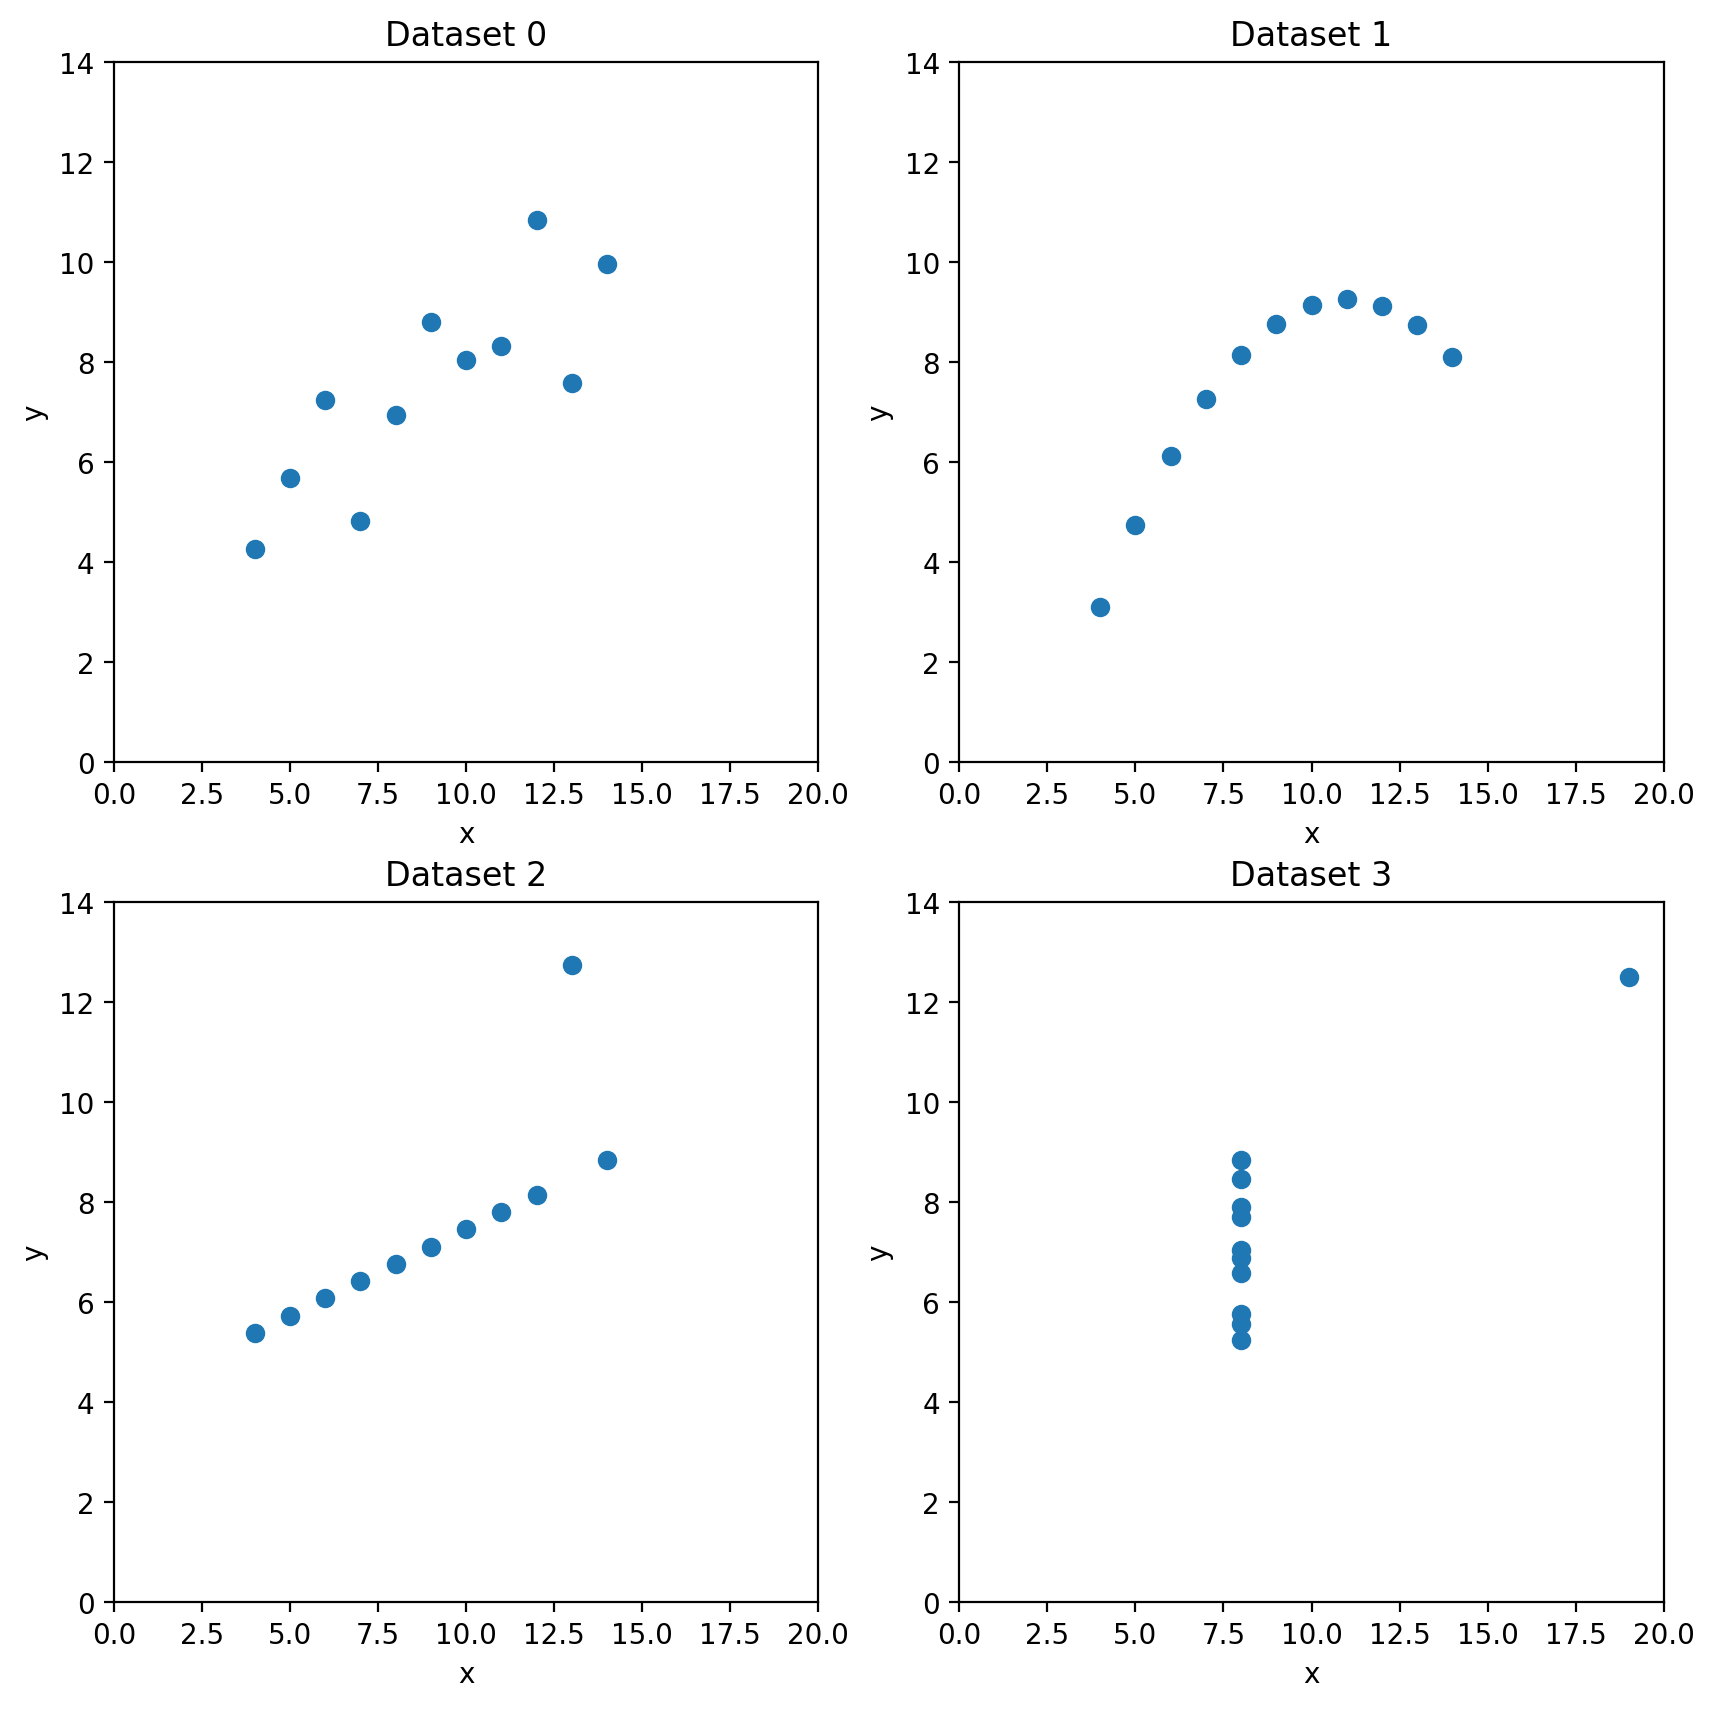

In [3]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2,figsize=(10,10))

for i,ax in enumerate(axs.flatten()):
    ax.plot(data[f'x{i}'],data[f'y{i}'],linestyle='none', marker='o')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim([0,20])
    ax.set_ylim([0,14])
    ax.set_title(f'Dataset {i}')


How do the datasets compare with one another? Were the summary statistics sufficient to see the differences in the data?

These data are a well-known dataset called Anscombe's Quartet and demonstrate how summary statistics don't always capture the entire story for a given dataset.

Now that you're flexing your data visualization muscles, repeat this process (gather the summary statistics, then visualize the data) for the 12 datasets in the file "twelve_datasets.csv" first looking at the summary statistics as before, then plotting a figure with twelve plots and each labeled by its dataset number in the CSV file.

In [4]:
import pandas as pd
import numpy as np

file = "data/twelve_datasets.csv"
data = pd.read_csv(file)
data

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11
0,65.815540,95.588374,55.3846,97.1795,32.331110,61.411101,53.366567,90.208030,50.481508,93.222701,...,57.613234,83.905171,51.147917,90.867412,55.993030,79.277264,51.203891,83.339777,47.695201,95.241187
1,65.672265,91.933402,51.5385,96.0256,53.421463,26.186880,52.801979,90.088065,50.282406,97.609984,...,51.274392,82.817983,50.517126,89.102395,50.032254,79.013071,58.974470,85.499818,44.609976,93.075835
2,39.002716,92.261838,46.1538,94.4872,63.920202,30.832194,47.054130,90.458936,50.186703,99.694680,...,50.753898,76.754129,50.207480,85.460047,51.288459,82.435940,51.872073,85.829738,43.856381,94.085872
3,37.795303,93.532455,42.8205,91.4103,70.289506,82.533649,42.448434,89.507700,50.326911,90.022053,...,37.021184,81.954470,50.069482,83.057670,51.170537,79.165294,48.179931,85.045117,41.578929,90.303567
4,35.513901,89.599190,40.7692,88.3333,34.118830,45.734551,42.704036,90.442629,50.456207,89.987410,...,42.881755,80.184770,50.562846,82.937822,44.377915,78.164628,41.683200,84.017941,49.177419,96.610532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,33.674442,26.090490,39.4872,25.3846,59.851838,72.958391,42.224120,30.498037,30.487392,19.779470,...,37.949784,26.521749,50.533635,17.019581,39.921363,19.701850,50.967748,29.679774,31.333244,32.538569
138,75.627255,37.128752,91.2821,41.5385,48.960460,72.629526,87.698464,50.489937,89.500180,31.978917,...,86.504391,34.894025,77.500907,50.166986,84.794278,55.568650,91.191054,46.674343,86.401550,38.746933
139,40.610125,89.136240,50.0000,95.7692,46.844855,36.791714,52.360331,89.704317,50.410272,98.628369,...,50.815485,78.950839,50.691124,87.513960,55.662959,83.356480,55.863768,85.336487,47.442112,98.184302
140,39.114366,96.481751,47.9487,95.0000,39.963022,42.944915,51.406787,89.712139,50.325924,94.994631,...,51.183467,85.128855,49.990395,83.997357,50.492248,78.997532,49.280595,84.048823,46.264741,94.116192


In [5]:
for i in range(12):
    print(f"-----------------")
    print(f"Dataset #{i}")
    print(f"Mean x: {data[f'x{i}'].mean():.2f}")
    print(f"Mean y: {data[f'y{i}'].mean():.2f}")
    print(f"Std  x: {data[f'x{i}'].std():.2f}")
    print(f"Std  y: {data[f'y{i}'].std():.2f}")
    print(f"Corr  : {np.corrcoef(data[f'x{i}'], data[f'y{i}'])[0][1]:.2f}")

-----------------
Dataset #0
Mean x: 54.27
Mean y: 47.83
Std  x: 16.77
Std  y: 26.94
Corr  : -0.07
-----------------
Dataset #1
Mean x: 54.26
Mean y: 47.83
Std  x: 16.77
Std  y: 26.94
Corr  : -0.06
-----------------
Dataset #2
Mean x: 54.27
Mean y: 47.83
Std  x: 16.77
Std  y: 26.94
Corr  : -0.06
-----------------
Dataset #3
Mean x: 54.26
Mean y: 47.83
Std  x: 16.77
Std  y: 26.94
Corr  : -0.06
-----------------
Dataset #4
Mean x: 54.27
Mean y: 47.84
Std  x: 16.77
Std  y: 26.94
Corr  : -0.07
-----------------
Dataset #5
Mean x: 54.26
Mean y: 47.84
Std  x: 16.77
Std  y: 26.93
Corr  : -0.07
-----------------
Dataset #6
Mean x: 54.27
Mean y: 47.84
Std  x: 16.77
Std  y: 26.93
Corr  : -0.06
-----------------
Dataset #7
Mean x: 54.27
Mean y: 47.84
Std  x: 16.77
Std  y: 26.94
Corr  : -0.07
-----------------
Dataset #8
Mean x: 54.26
Mean y: 47.84
Std  x: 16.77
Std  y: 26.93
Corr  : -0.06
-----------------
Dataset #9
Mean x: 54.27
Mean y: 47.84
Std  x: 16.76
Std  y: 26.93
Corr  : -0.07
----------

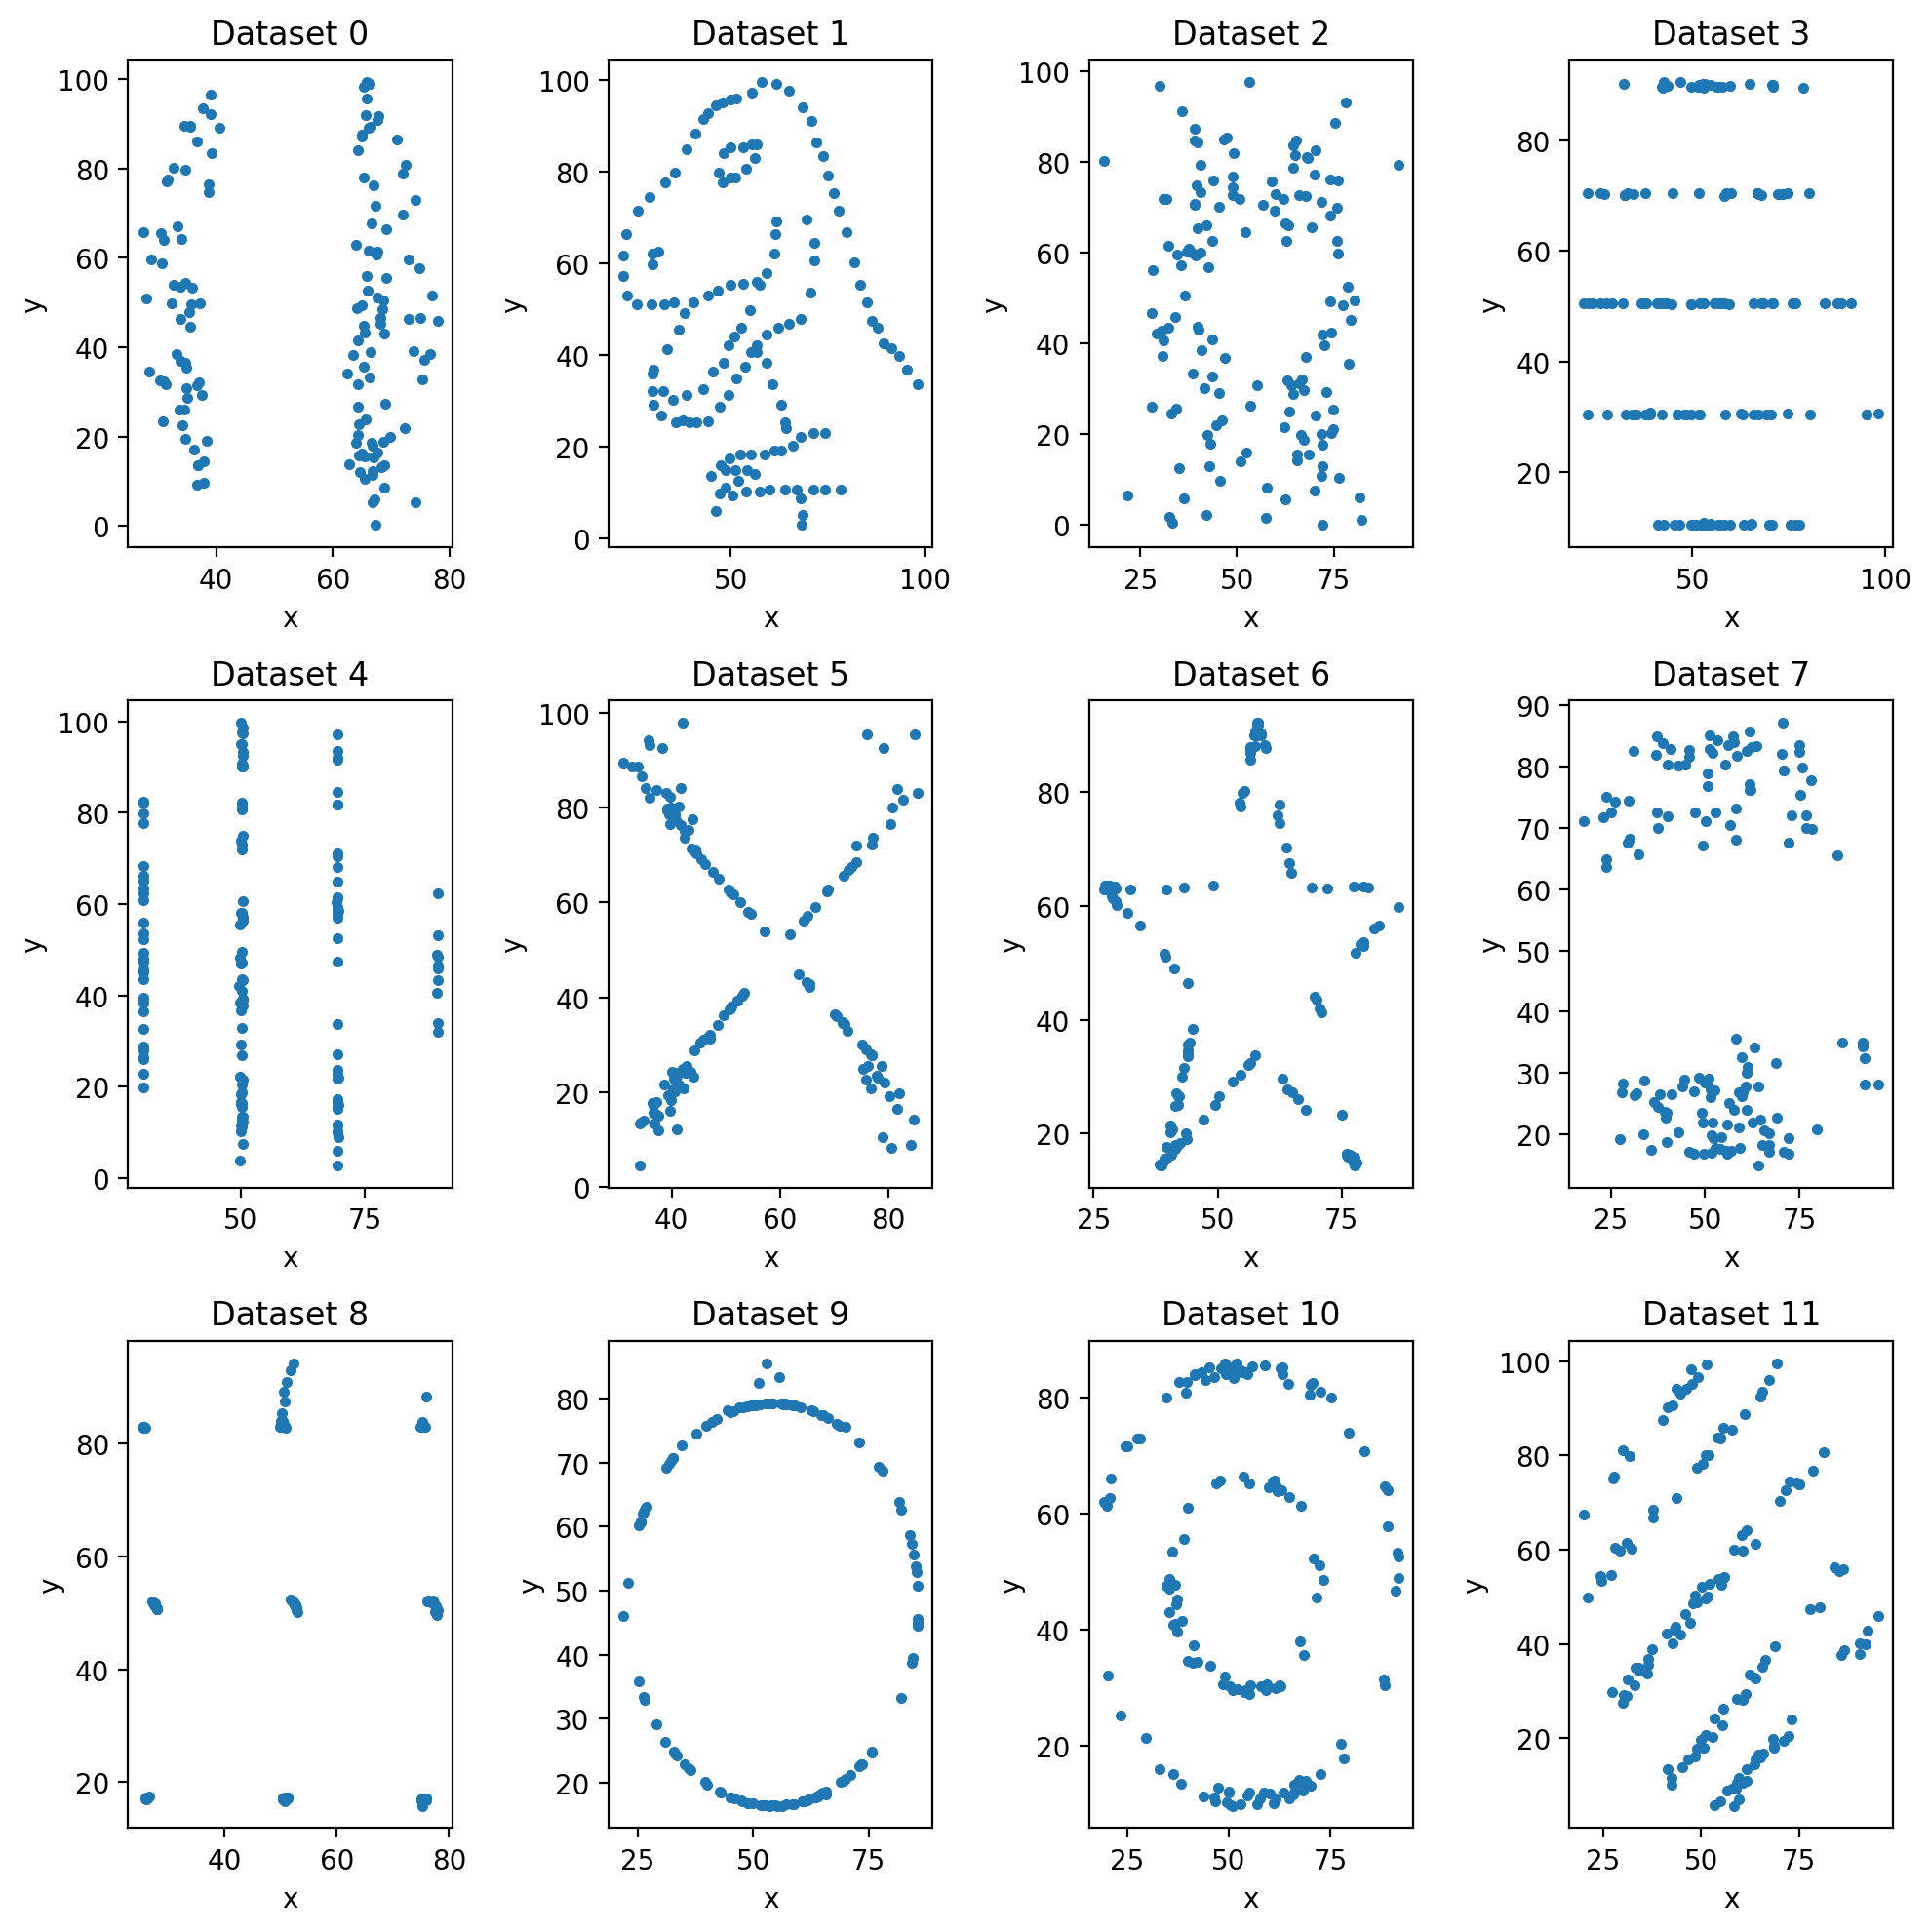

In [6]:
fig, axs = plt.subplots(3, 4, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ax.plot(data[f"x{i}"], data[f"y{i}"], linestyle="none", marker="o", markersize=3)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Dataset {i}")
plt.tight_layout()

Note these these datasets and patterns as you will refer to these in a later quiz.

Hopefully, this exercise makes clear the immense importance of visualizing your data and complementing the important information summary statistics provide with visual inspection of the data. Who knows what you may find!

**References**:
- Anscombe, F.J., 1973. Graphs in statistical analysis. The american statistician, 27(1), pp.17-21.
- Matejka, J. and Fitzmaurice, G., 2017, May. Same stats, different graphs: generating datasets with varied appearance and identical statistics through simulated annealing. In Proceedings of the 2017 CHI conference on human factors in computing systems (pp. 1290-1294).